In [1]:
#loan approval prediction
#importing all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
#import the dataset loan.csv
df=pd.read_csv("C:\\Users\\TUSHAR SAIN\\Downloads\\loan_data_set.csv")
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
#dataset
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


(array([ 12.,  60., 142., 168.,  90.,  53.,  15.,  18.,  10.,   5.,   4.,
          2.,   1.,   4.,   3.,   0.,   1.,   2.,   1.,   1.]),
 array([  9.  ,  43.55,  78.1 , 112.65, 147.2 , 181.75, 216.3 , 250.85,
        285.4 , 319.95, 354.5 , 389.05, 423.6 , 458.15, 492.7 , 527.25,
        561.8 , 596.35, 630.9 , 665.45, 700.  ]),
 <BarContainer object of 20 artists>)

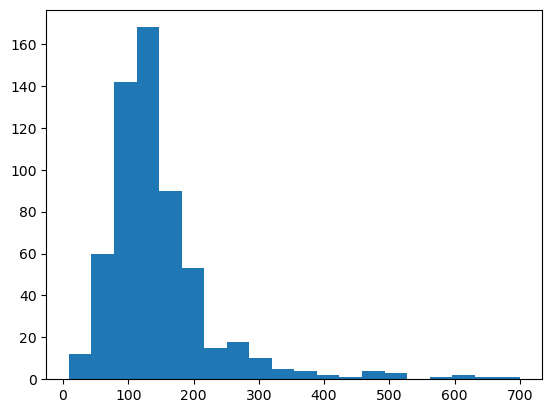

In [5]:
plt.hist(df["LoanAmount"],bins=20)

(array([  1.,   0.,   1.,   0.,   3.,   2.,   4.,  12.,  17.,  32.,  63.,
        137., 129.,  99.,  32.,  29.,  13.,   6.,   7.,   5.]),
 array([2.19722458, 2.41491737, 2.63261015, 2.85030294, 3.06799573,
        3.28568852, 3.5033813 , 3.72107409, 3.93876688, 4.15645967,
        4.37415246, 4.59184524, 4.80953803, 5.02723082, 5.24492361,
        5.4626164 , 5.68030918, 5.89800197, 6.11569476, 6.33338755,
        6.55108034]),
 <BarContainer object of 20 artists>)

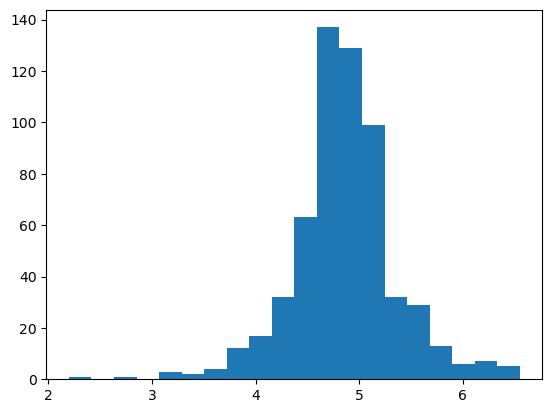

In [6]:
df['LoanAmount_log']=np.log(df["LoanAmount"])
plt.hist(df["LoanAmount_log"],bins=20)

In [7]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     592 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


(array([  1.,   6.,  19.,  34.,  80., 106., 112.,  93.,  53.,  38.,  24.,
         17.,  13.,   7.,   2.,   2.,   4.,   1.,   1.,   1.]),
 array([ 7.27378632,  7.47520722,  7.67662813,  7.87804904,  8.07946994,
         8.28089085,  8.48231175,  8.68373266,  8.88515356,  9.08657447,
         9.28799538,  9.48941628,  9.69083719,  9.89225809, 10.093679  ,
        10.2950999 , 10.49652081, 10.69794172, 10.89936262, 11.10078353,
        11.30220443]),
 <BarContainer object of 20 artists>)

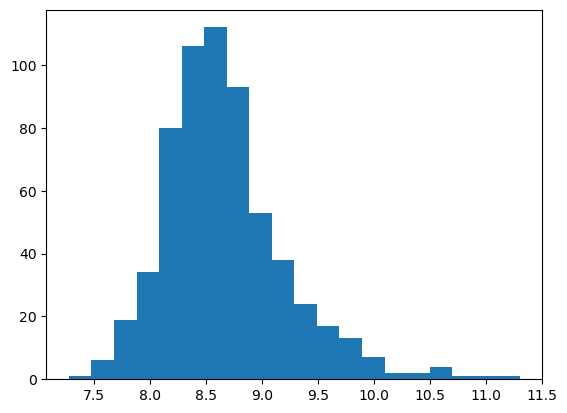

In [8]:
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["TotalIncome_log"]=np.log(df["TotalIncome"])
plt.hist(df["TotalIncome_log"],bins=20)

In [9]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)

df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log=df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [10]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values


In [11]:
print(x)
print(y)

[['Male' 'No' '0' ... 1.0 4.857444178729352 5849.0]
 ['Male' 'Yes' '1' ... 1.0 4.852030263919617 6091.0]
 ['Male' 'Yes' '0' ... 1.0 4.189654742026425 3000.0]
 ...
 ['Male' 'Yes' '1' ... 1.0 5.53338948872752 8312.0]
 ['Male' 'Yes' '2' ... 1.0 5.231108616854587 7583.0]
 ['Female' 'No' '0' ... 0.0 4.890349128221754 4583.0]]
['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N'

In [12]:
print("percent of missing gender is:",(df["Gender"].isnull().sum()/df.shape[0])*100,"%")

percent of missing gender is: 0.0 %


Number of people who take loan as groupe by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

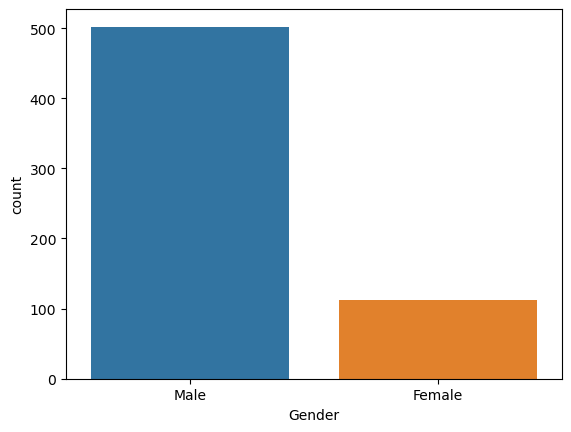

In [13]:
print("Number of people who take loan as groupe by gender")
print(df["Gender"].value_counts())
sns.countplot(x=df["Gender"])



Number of people who take loan as groupe by maritial status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

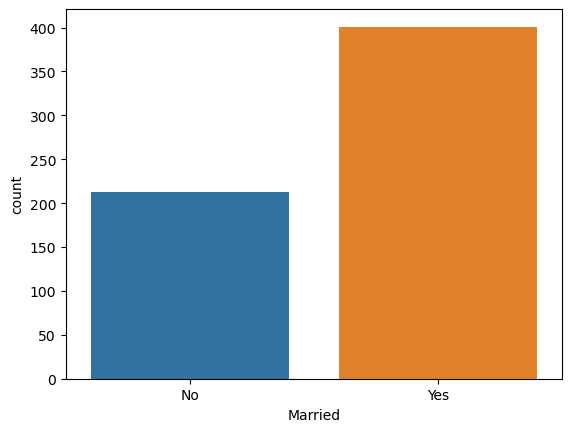

In [14]:
print("Number of people who take loan as groupe by maritial status")
print(df["Married"].value_counts())
sns.countplot(x=df["Married"])

Number of people who take loan as groupe by Dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

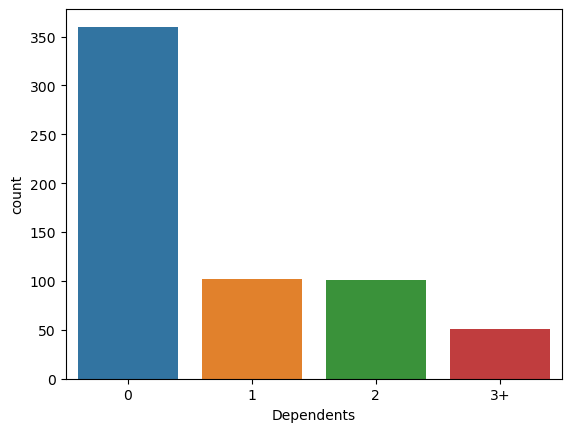

In [15]:
print("Number of people who take loan as groupe by Dependents")
print(df["Dependents"].value_counts())
sns.countplot(x=df["Dependents"])

Number of people who take loan as groupe by Loan_Amount
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

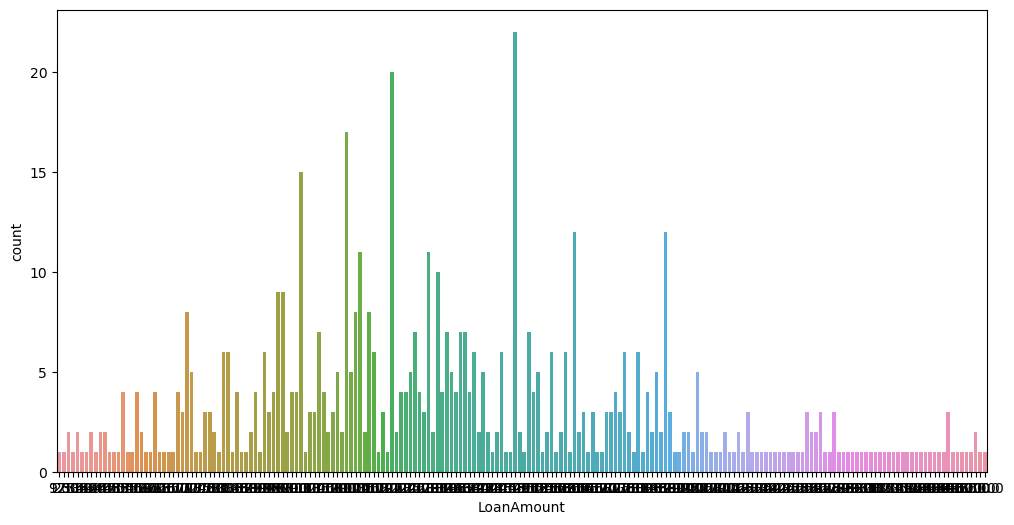

In [16]:
print("Number of people who take loan as groupe by Loan_Amount")
print(df["LoanAmount"].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df["LoanAmount"])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
for i in range(0,5):
    x_train[:,i]=lb.fit_transform(x_train[:,i])
    x_train[:,7]=lb.fit_transform(x_train[:,7])
x_train   

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [19]:
y_train=lb.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [20]:
y_test=lb.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [21]:
for i in range(0,5):
    x_test[:,i]=lb.fit_transform(x_test[:,i])
    x_test[:,7]=lb.fit_transform(x_test[:,7])


In [22]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [23]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x_train=sd.fit_transform(x_train)
x_test=sd.fit_transform(x_test)

In [24]:
#by random forest classification
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()
rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
y_pred=rf_classifier.predict(x_test)
from sklearn import metrics
print("the Random Forest Classifier accuracy:",metrics.accuracy_score(y_pred,y_test))


the Random Forest Classifier accuracy: 0.7804878048780488


In [26]:
#from the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf_tree.fit(x_train,y_train)
y_predict=clf_tree.predict(x_test)
print("the decision tree classifier accuracy:",metrics.accuracy_score(y_predict,y_test))

the decision tree classifier accuracy: 0.8130081300813008


In [27]:
#by logestic regression
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(x_train,y_train)
y_predict1=classifier.predict(x_test)
print("the logistic regression accuracy:",metrics.accuracy_score(y_predict1,y_test))

the logistic regression accuracy: 0.8292682926829268


In [28]:
#by k_mean classification
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_predict2=classifier.predict(x_test)
print("the k_mean accuracy:",metrics.accuracy_score(y_predict2,y_test))

the k_mean accuracy: 0.7967479674796748


In [29]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(x_train,y_train)
y_predict3=classifier.predict(x_test)
print("the  navie_bayes accuracy:",metrics.accuracy_score(y_predict3,y_test))

the  navie_bayes accuracy: 0.8292682926829268


In [30]:
#checking the test_exapmle
dx=df.iloc[0:10,np.r_[1:5,9:11,13:15]].values
lb=LabelEncoder()
for i in range(0,4):
    dx[:,i]=lb.fit_transform(dx[:,i])
dx    
dx=sd.fit_transform(dx)

In [31]:

#from the decision tree classifie

print(clf_tree.predict(dx))


[1 1 1 1 1 1 1 0 1 1]


In [32]:

df.iloc[0:10,12]

0    Y
1    N
2    Y
3    Y
4    Y
5    Y
6    Y
7    N
8    Y
9    N
Name: Loan_Status, dtype: object